In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(stringr)
library(Sierra)
library(presto)
library(ggplot2)
library(msigdbr)
library(fgsea)
library(sctransform)
library(tidyverse)
setwd('/data1/APA/Paul_ALS_Data/')

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
"replacing previous import 'GenomicRanges::union' by 'dplyr::union' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::intersect' by 'dplyr::intersect' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::setdiff' by 'dplyr::setdiff' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::tail' by 'utils::tail' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::head' by 'utils::head' when loading 'Sierra'"
Loading required package: Rcpp

Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


Registered S3 method overwritten by 'cli':
  method     f

In [2]:
reference.file <- '/home/aiden/data/refgenome/refdata-gex-GRCh38-2020-A/genes//genes.gtf'
gtf_gr <- rtracklayer::import(reference.file)
gtf_TxDb <- GenomicFeatures::makeTxDbFromGFF(reference.file, format="gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



In [5]:
peaks_so <- readRDS('rdata/ALS_CT_v3_final_MD.rds')

In [6]:
peaks_so <- readRDS('rdata/ALS_CT_v3_final_MD.rds')
peaks_so_ct <- subset(peaks_so, subset= group == 'control')
peaks_so_ct

An object of class Seurat 
279088 features across 23147 samples within 1 assay 
Active assay: RNA (279088 features, 0 variable features)

In [7]:
## normalization
peaks_so_ct <- NormalizeData(peaks_so_ct, normalization.method = "LogNormalize", scale.factor = 10000)


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 79 rows containing missing values (geom_scattermore)."


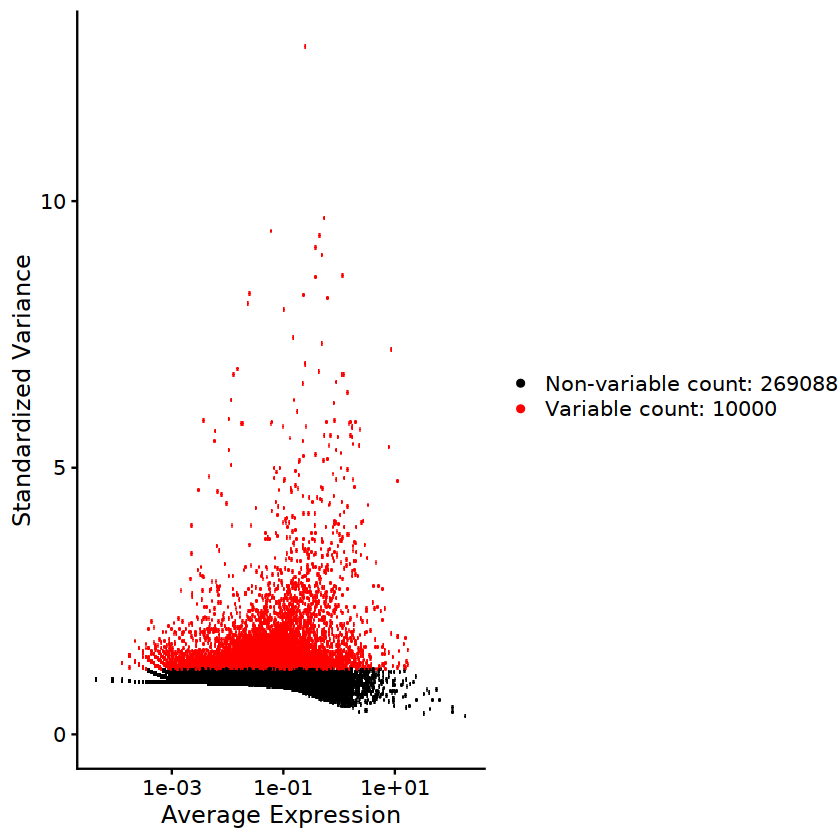

In [11]:
peaks_so_ct <- FindVariableFeatures(peaks_so_ct, selection.method = "vst", nfeatures = 10000)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(peaks_so_ct)
plot1

In [12]:
peaks_so_ct <- ScaleData(peaks_so_ct)

Centering and scaling data matrix



PC_ 1 
Positive:  CTNNA2:chr2:79873865-80393443:1, GABRB1:chr4:47031294-47320146:1, SOX5:chr12:24212975-24562544:-1, SLC1A2:chr11:35260766-35286782:-1, CTNNA2:chr2:79512723-79858092:1, AC092691.1:chr3:117728593-117997592:-1, PARD3:chr10:34450129-34815325:-1, ADCY2:chr5:7396138-7696246:1, SLC1A2:chr11:35260766-35265880:-1, NRCAM:chr7:108232368-108456717:-1 
	   DTNA:chr18:34679290-34812258:1, DTNA:chr18:34851468-34866660:1, CPE:chr4:165379336-165467867:1, PDE7B:chr6:135851811-136147401:1, SLC1A2:chr11:35251205-35251593:-1, ATP1A2:chr1:160143031-160143591:1, ATP1A2:chr1:160142302-160142862:1, CTNNA2:chr2:79651647-79858263:1, RYR3:chr15:33311067-33533678:1, CACNB2:chr10:18140677-18498689:1 
	   SOX5:chr12:23755699-23896059:-1, NRCAM:chr7:108239892-108399572:-1, CACNB2:chr10:18150941-18402472:1, SPARCL1:chr4:87493981-87529535:-1, DTNA:chr18:34755750-34812068:1, C1orf61:chr1:156404250-156414685:-1, C1orf21:chr1:184387029-184619763:1, FGFR3:chr4:1808455-1808872:1, MAPK10:chr4:86327446-864580

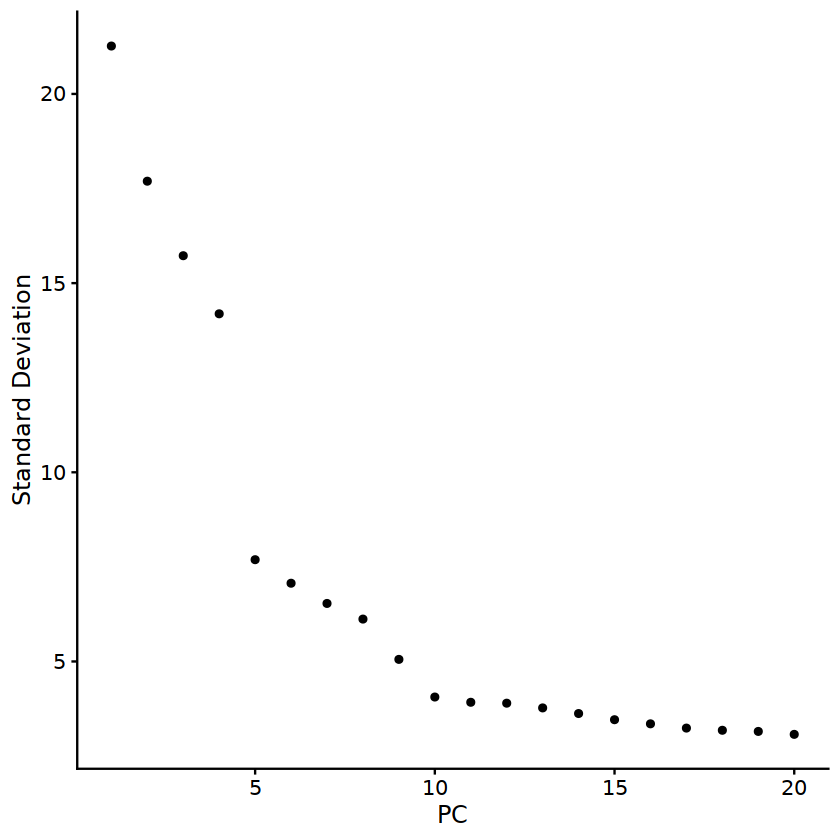

In [13]:
peaks_so_ct <- RunPCA(peaks_so_ct, features = VariableFeatures(object = peaks_so_ct))
ElbowPlot(peaks_so_ct)

In [14]:
peaks_so_ct <- FindNeighbors(peaks_so_ct, dims = 1:15)
peaks_so_ct <- FindClusters(peaks_so_ct, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 23147
Number of edges: 785953

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9198
Number of communities: 18
Elapsed time: 6 seconds


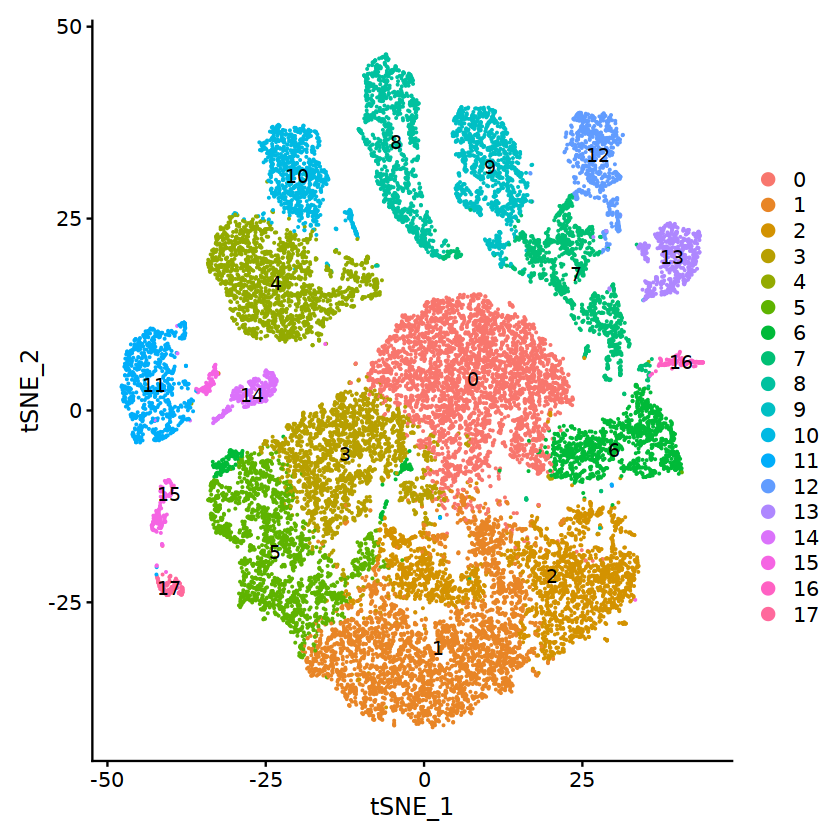

In [20]:
# peaks_so_ct <- RunTSNE(peaks_so_ct, dims=1:15)
DimPlot(peaks_so_ct, label=T)

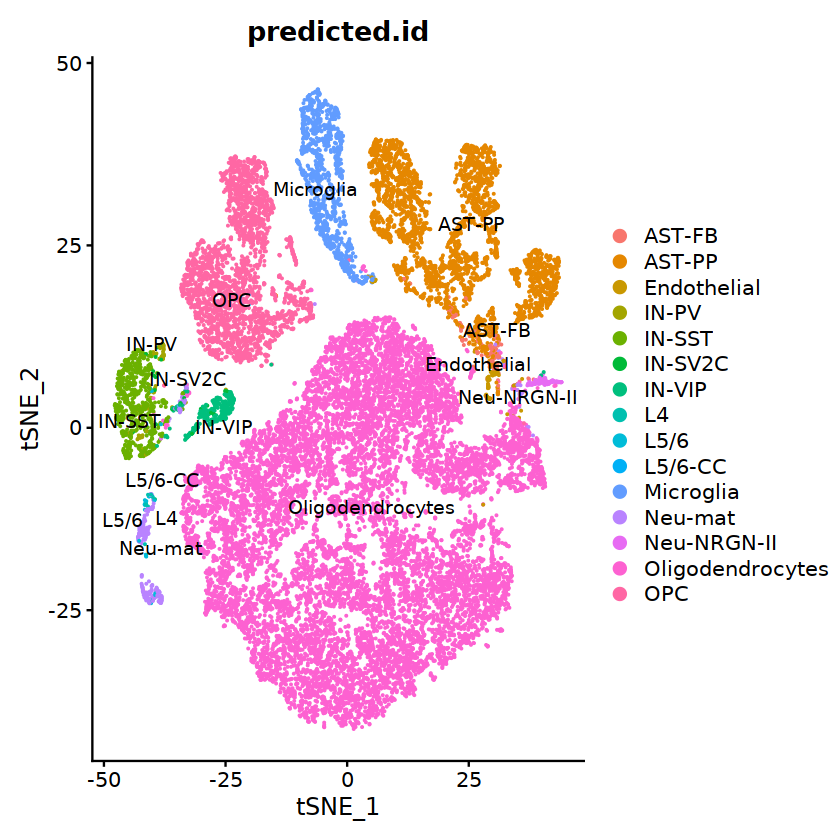

In [19]:
DimPlot(peaks_so_ct, group.by = 'predicted.id', label=T, repel=T)

[1] "11902 expressed peaks in feature types UTR3"
[1] "11296 peaks after filtering out A-rich annotations"
[1] "2401 genes detected with multiple peak sites expressed"
[1] "8863 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
FAM171B:chr2:186694060-186747260:1   UTR3               0.9129794      
FAM171B:chr2:186740445-186747440:1   UTR3               0.5088496      
SLC1A3:chr5:36680218-36686526:1      UTR3               0.8716814      
SLC1A3:chr5:36683583-36686598:1      UTR3               0.7005900      
SLC1A3:chr5:36686066-36686660:1      UTR3               0.5294985      
SLC1A3:chr5:36686796-36687674:1      UTR3               0.7286136      
SLC1A3:chr5:36687000-36687408:1      UTR3               0.5575221      
SLC1A3:chr5:36686320-36686578:1      UTR3               0.2669617      
MACF1:chr1:39319646-39327326:1       UTR3               0.6651917      
MACF1:chr1:39318480-39324855:1       UTR3               0.6504425      
MACF1:chr1:39322490-39324813:1       UTR3               0.5014749      
MACF1:chr1:39317096-39322610:1       UTR3               0.4454277      
MACF1:chr1:39319637-39322624:1       UTR3               0.3539823      
CIRBP:chr19:1271555-1272748:1        UTR3               0.4837758      
CIRBP:chr19:1272166-1272814:1        UTR3               0.3938053      
CIRBP:chr19:1271270-1272315:1        UTR3               0.3008850      
GJA1:chr6:121447147-121448497:1      UTR3               0.5929204      
NFIA:chr1:61082377-61088369:1        UTR3               0.5589971      
EHMT1:chr9:137618992-137716942:1     UTR3               0.6902655      
FGFR3:chr4:1807401-1807905:1         UTR3               0.2477876      
LRMDA:chr10:76444529-76557364:1      UTR3               0.6681416      
SCARA3:chr8:27659356-27676776:1      UTR3               0.4823009      
PCDH17:chr13:57666619-57724809:1     UTR3               0.3938053      
DTNA:chr18:34882119-34887978:1       UTR3               0.7684366      
DTNA:chr18:34884654-34888012:1       UTR3               0.6769912      
DTNA:chr18:34887628-34888006:1       UTR3               0.3333333      
DTNA:chr18:34891008-34891458:1       UTR3               0.6415929      
DTNA:chr18:34890448-34891464:1       UTR3               0.8126844      
DTNA:chr18:34887420-34888194:1       UTR3               0.3997050      
DTNA:chr18:34888740-34889130:1       UTR3               0.1460177      
⋮                                    ⋮                  ⋮              
PAX6:chr11:31789031-31789625:-1      UTR3               0.25516224     
TUBE1:chr6:112078919-112079751:-1    UTR3               0.06784661     
IQSEC1:chr3:12897174-12897660:-1     UTR3               0.10766962     
CLK1:chr2:200853009-200853446:-1     UTR3               0.27433628     
CLK1:chr2:200853009-200853981:-1     UTR3               0.28761062     
CACNA2D1:chr7:82038099-82084985:-1   UTR3               0.23893805     
EIF4G3:chr1:20806349-20807181:-1     UTR3               0.12241888     
FBXO21:chr12:117143554-117144429:-1  UTR3               0.14749263     
ELAVL3:chr19:11451326-11452062:-1    UTR3               0.07079646     
ZFR:chr5:32354350-32354849:-1        UTR3               0.12979351     
N4BP2L2:chr13:32432759-32436484:-1   UTR3               0.11651917     
CEP85L:chr6:118460772-118461705:-1   UTR3               0.12684366     
CEP85L:chr6:118460909-118461507:-1   UTR3               0.12094395     
S100B:chr21:46599385-46599523:-1     UTR3               0.10176991     
BMP7:chr20:57168753-57169164:-1      UTR3               0.15044248     
NDUFA5:chr7:123540982-123541509:-1   UTR3               0.09734513     
KCNA2:chr1:110593522-110594032:-1    UTR3               0.16519174     
UBL3:chr13:29764903-29765509:-1      UTR3               0.05014749     
HEXA:chr15:72343765-72346531:-1      UTR3               0.14749263     
PARN:chr16:14606325-14628305:-1      UTR3               0.22861357     
TOMM20:chr1:235109341-235109725:-1   UTR3               0.05604720     
HSPA13:chr21:14371115-14371495:-1    UTR3               0.05752212     
BRD8:chr5:138170808-138171469:-1     UTR3               0.15191740     
SEPTIN8:chr5:132758066-132758648:-1  UTR3               0.12536873     
TP53B

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 4.05617281721471e-53"


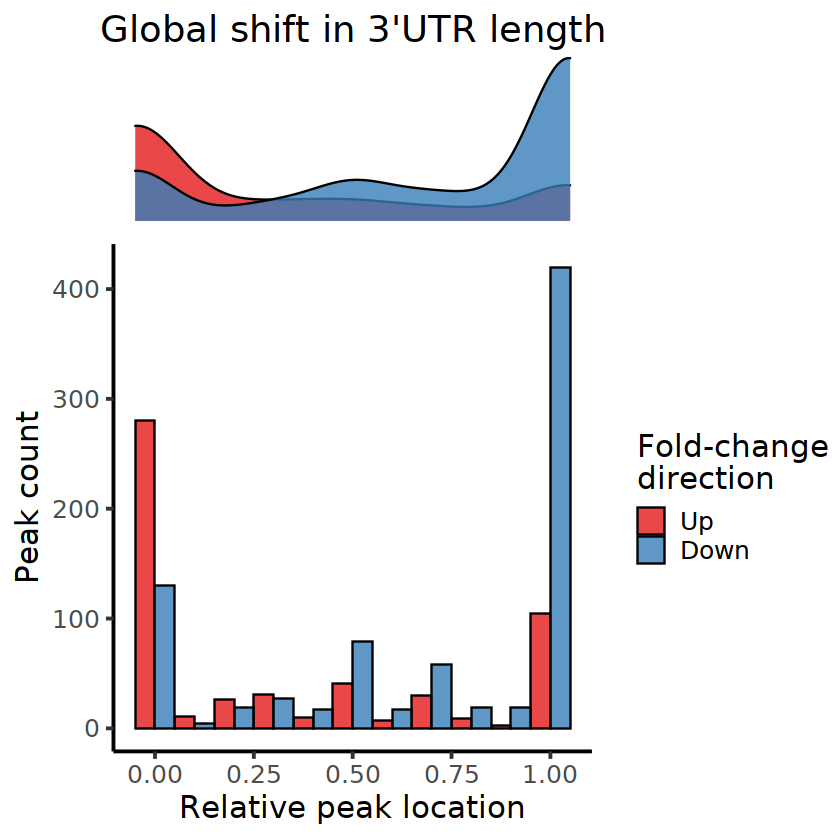

In [24]:
Ast_12vs9_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so_ct, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = '12', 
                                      population.2 =  '9')
Ast_12vs9_utrshift
PlotUTRLengthShift(Ast_12vs9_utrshift)

[1] "10967 expressed peaks in feature types UTR3"
[1] "10406 peaks after filtering out A-rich annotations"
[1] "2236 genes detected with multiple peak sites expressed"
[1] "7971 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
FAM171B:chr2:186694060-186747260:1  UTR3               0.86738351     
FAM171B:chr2:186740445-186747440:1  UTR3               0.34408602     
DTNA:chr18:34890448-34891464:1      UTR3               0.71684588     
DTNA:chr18:34891008-34891458:1      UTR3               0.52867384     
DTNA:chr18:34882119-34887978:1      UTR3               0.61290323     
DTNA:chr18:34884654-34888012:1      UTR3               0.53763441     
DTNA:chr18:34887628-34888006:1      UTR3               0.23655914     
DTNA:chr18:34887420-34888194:1      UTR3               0.28853047     
DTNA:chr18:34890746-34891022:1      UTR3               0.48207885     
SLC1A3:chr5:36680218-36686526:1     UTR3               0.79569892     
SLC1A3:chr5:36683583-36686598:1     UTR3               0.53942652     
SLC1A3:chr5:36687000-36687408:1     UTR3               0.44802867     
SLC1A3:chr5:36686796-36687674:1     UTR3               0.62724014     
CADM2:chr3:85912454-86066827:1      UTR3               0.77956989     
PCDH17:chr13:57666619-57724809:1    UTR3               0.33333333     
EIF1:chr17:41691178-41691718:1      UTR3               0.23655914     
SCARA3:chr8:27659356-27676776:1     UTR3               0.58602151     
NDFIP1:chr5:142131882-142152229:1   UTR3               0.48028674     
CLTC:chr17:59619689-59651257:1      UTR3               0.27419355     
NCAN:chr19:19248611-19249969:1      UTR3               0.22759857     
ATP2A2:chr12:110292083-110327737:1  UTR3               0.32078853     
ITM2B:chr13:48233209-48256359:1     UTR3               0.45698925     
SLC6A1:chr3:11029135-11030257:1     UTR3               0.43010753     
SLC6A1:chr3:11029183-11029645:1     UTR3               0.22222222     
PDIA3:chr15:43756561-43765651:1     UTR3               0.09498208     
PDIA3:chr15:43756570-43763362:1     UTR3               0.08602151     
MICOS10:chr1:19597059-19626650:1    UTR3               0.30824373     
RGL1:chr1:183922246-183926807:1     UTR3               0.09856631     
HSP90B1:chr12:103930145-103932986:1 UTR3               0.08243728     
HSP90B1:chr12:103930122-103934085:1 UTR3               0.09677419     
⋮                                   ⋮                  ⋮              
SLTM:chr15:58913393-58933679:-1     UTR3               0.34587814     
CD59:chr11:33708522-33709498:-1     UTR3               0.13440860     
IDH2:chr15:90083938-90084407:-1     UTR3               0.10035842     
IDH2:chr15:90083937-90084926:-1     UTR3               0.10215054     
SLC35F5:chr2:113714011-113715229:-1 UTR3               0.07885305     
SAFB2:chr19:5610041-5611209:-1      UTR3               0.07706093     
CTSB:chr8:11844205-11844847:-1      UTR3               0.10035842     
SPAG9:chr17:50965498-50966212:-1    UTR3               0.20430108     
LRP6:chr12:12116025-12116405:-1     UTR3               0.06272401     
LANCL1:chr2:210431249-210431624:-1  UTR3               0.06093190     
MRPL20:chr1:1401909-1402242:-1      UTR3               0.07347670     
HNRNPDL:chr4:82424585-82425063:-1   UTR3               0.39068100     
ACAP2:chr3:195274745-195275113:-1   UTR3               0.11827957     
SUGP2:chr19:18990888-18991197:-1    UTR3               0.45519713     
CCNI:chr4:77047155-77047513:-1      UTR3               0.05734767     
LONRF2:chr2:100281856-100282356:-1  UTR3               0.06451613     
UBE2G2:chr21:44776764-44777410:-1   UTR3               0.12903226     
STOM:chr9:121338987-121339534:-1    UTR3               0.11111111     
HNRNPU:chr1:244840638-244841183:-1  UTR3               0.13978495     
REV3L:chr6:111376018-111377808:-1   UTR3               0.08960573     
TRIM9:chr14:50975262-50975604:-1    UTR3               0.24372760     
TMEM167A:chr5:83056099-83062280:-1  UTR3               0.07168459     
CLASP2:chr3:33496673-33497921:-1    UTR3               0.22759857     
FAIM2:chr12:49866896-49867271:-1    UTR3               0.15053763     
GATM:chr15:45361124-45361509:-1     UTR3               0.247

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 2.00841901630556e-14"


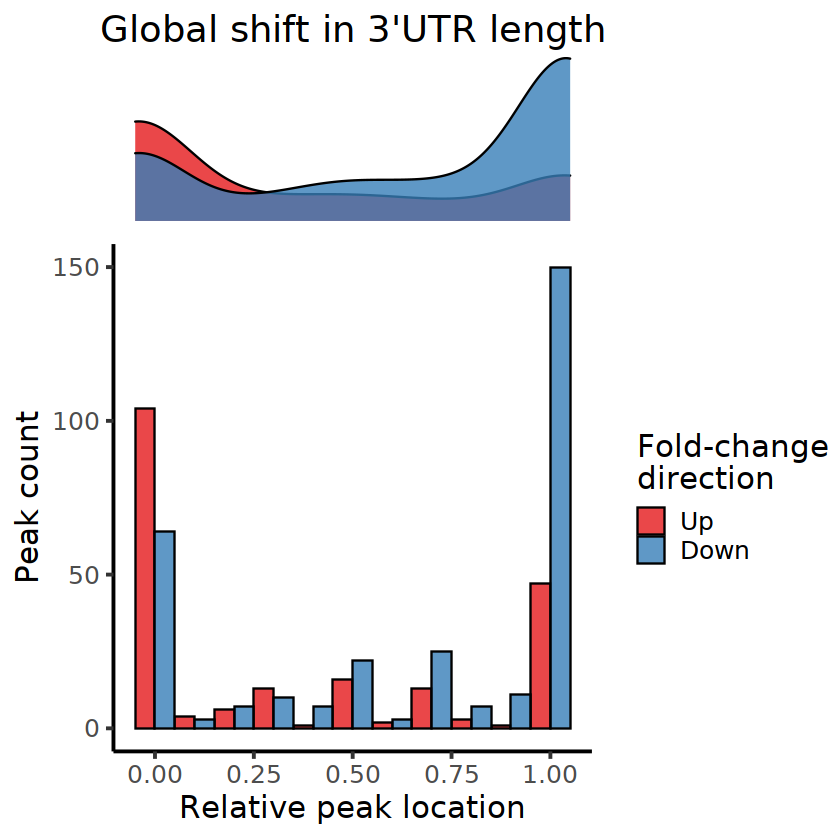

In [25]:
Ast_13vs9_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so_ct, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = '13', 
                                      population.2 =  '9')
Ast_13vs9_utrshift
PlotUTRLengthShift(Ast_13vs9_utrshift)

[1] "7755 expressed peaks in feature types UTR3"
[1] "7325 peaks after filtering out A-rich annotations"
[1] "1572 genes detected with multiple peak sites expressed"
[1] "5583 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
LUC7L3:chr17:50752184-50752755:1     UTR3               0.56093190     
LUC7L3:chr17:50751716-50752340:1     UTR3               0.36559140     
SOX9:chr17:72125967-72126416:1       UTR3               0.33512545     
DTNA:chr18:34890448-34891464:1       UTR3               0.71684588     
DTNA:chr18:34891008-34891458:1       UTR3               0.52867384     
DTNA:chr18:34884654-34888012:1       UTR3               0.53763441     
DTNA:chr18:34882119-34887978:1       UTR3               0.61290323     
DTNA:chr18:34890746-34891022:1       UTR3               0.48207885     
DTNA:chr18:34887420-34888194:1       UTR3               0.28853047     
DTNA:chr18:34887628-34888006:1       UTR3               0.23655914     
LRMDA:chr10:76444529-76557364:1      UTR3               0.22939068     
MACF1:chr1:39485515-39486388:1       UTR3               0.74910394     
MACF1:chr1:39484698-39486208:1       UTR3               0.74193548     
MACF1:chr1:39486496-39487054:1       UTR3               0.55913978     
MACF1:chr1:39485933-39486659:1       UTR3               0.52329749     
MACF1:chr1:39485589-39485829:1       UTR3               0.52508961     
STXBP5L:chr3:120909493-121121681:1   UTR3               0.07706093     
ZNF451:chr6:57169709-57170305:1      UTR3               0.18458781     
PLP1:chrX:103792115-103792619:1      UTR3               0.48387097     
DDX3X:chrX:41349808-41350295:1       UTR3               0.31899642     
RYR3:chr15:33865532-33866121:1       UTR3               0.48924731     
MAT2A:chr2:85544856-85545281:1       UTR3               0.57885305     
SLC6A1:chr3:11038666-11039247:1      UTR3               0.68279570     
SPTBN1:chr2:54669216-54669736:1      UTR3               0.26164875     
HNRNPA3:chr2:177223323-177223958:1   UTR3               0.20430108     
CALM1:chr14:90407839-90408268:1      UTR3               0.27777778     
ID4:chr6:19841681-19842197:1         UTR3               0.27060932     
ID4:chr6:19841389-19842197:1         UTR3               0.29032258     
BPTF:chr17:67975753-67982653:1       UTR3               0.29569892     
MERTK:chr2:112028973-112029408:1     UTR3               0.34767025     
⋮                                    ⋮                  ⋮              
DDX5:chr17:64502411-64503816:-1      UTR3               0.43189964     
DDX5:chr17:64502847-64503395:-1      UTR3               0.37275986     
DDX5:chr17:64502874-64503174:-1      UTR3               0.30107527     
ZFP36L1:chr14:68788387-68788543:-1   UTR3               0.04838710     
ZFP36L1:chr14:68789121-68789727:-1   UTR3               0.04121864     
GFAP:chr17:44913099-44915398:-1      UTR3               0.08243728     
GFAP:chr17:44913696-44915904:-1      UTR3               0.08422939     
GFAP:chr17:44913552-44914131:-1      UTR3               0.03942652     
NACC2:chr9:136006950-136007781:-1    UTR3               0.24731183     
CSGALNACT1:chr8:19405660-19408942:-1 UTR3               0.25806452     
DPH6:chr15:35372842-35546193:-1      UTR3               0.56272401     
SORBS1:chr10:95314827-95318573:-1    UTR3               0.12007168     
CTNND2:chr5:10992506-11018163:-1     UTR3               0.60035842     
BBS2:chr16:56502344-56520087:-1      UTR3               0.56272401     
TMED10:chr14:75134862-75176612:-1    UTR3               0.31182796     
HNRNPU:chr1:244855537-244858231:-1   UTR3               0.20609319     
HNRNPU:chr1:244856558-244860387:-1   UTR3               0.17741935     
HNRNPU:chr1:244855949-244856927:-1   UTR3               0.15053763     
HNRNPDL:chr4:82427265-82429467:-1    UTR3               0.57526882     
GPM6A:chr4:175632934-175633273:-1    UTR3               0.42652330     
ACSL6:chr5:131954348-131970462:-1    UTR3               0.53405018     
ACSL6:chr5:131954332-131962600:-1    UTR3               0.37813620     
SCAPER:chr15:76765014-76767089:-1    UTR3               0.08960573     
SCAPER:chr15:76764965-76771819:-1    UTR3               0.11648746     
QDPR:

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 3.99576223198207e-06"


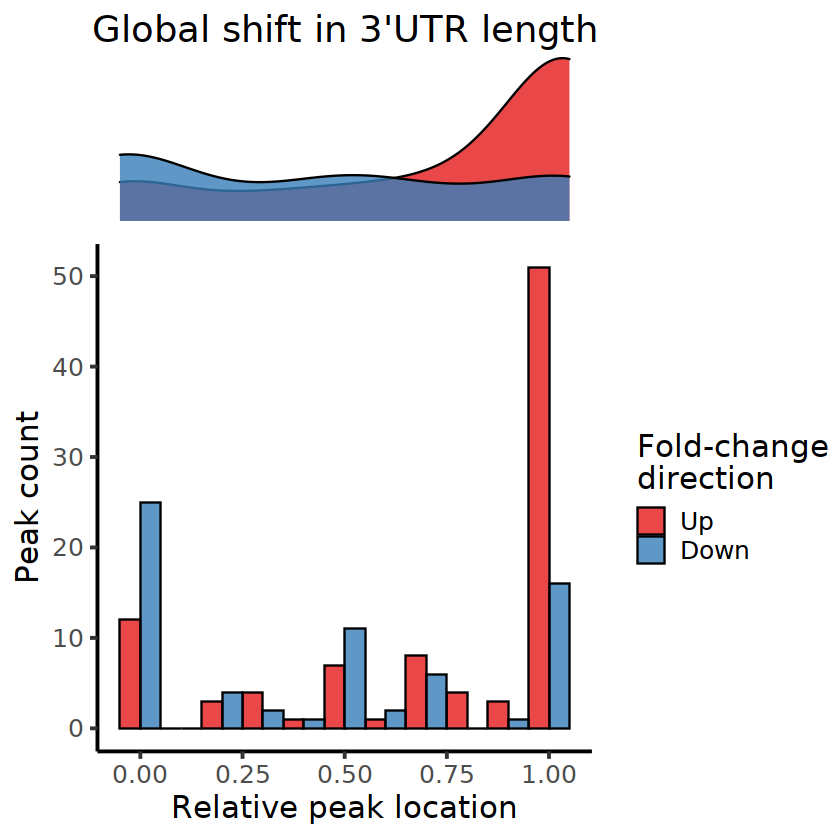

In [27]:
Ast_13vs7_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so_ct, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = '13', 
                                      population.2 =  '7')
Ast_13vs7_utrshift
PlotUTRLengthShift(Ast_13vs7_utrshift)

[1] "10119 expressed peaks in feature types UTR3"
[1] "9582 peaks after filtering out A-rich annotations"
[1] "2005 genes detected with multiple peak sites expressed"
[1] "7644 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
MYT1:chr20:64240937-64241849:1       UTR3               0.6258352      
RAB10:chr2:26034113-26135645:1       UTR3               0.8942094      
CIRBP:chr19:1271555-1272748:1        UTR3               0.5022272      
CIRBP:chr19:1271270-1272315:1        UTR3               0.3006682      
CIRBP:chr19:1272166-1272814:1        UTR3               0.3964365      
ITM2B:chr13:48233209-48256359:1      UTR3               0.5423163      
ITM2B:chr13:48253741-48253999:1      UTR3               0.1837416      
YBX1:chr1:42682418-42702460:1        UTR3               0.4153675      
BCAN:chr1:156648697-156652339:1      UTR3               0.6915367      
BCAN:chr1:156651382-156651776:1      UTR3               0.6169265      
EMC10:chr19:50482729-50483522:1      UTR3               0.2806236      
EMC10:chr19:50482450-50483026:1      UTR3               0.1492205      
PLP1:chrX:103792115-103792619:1      UTR3               0.5077951      
BAALC:chr8:103212949-103228405:1     UTR3               0.3051225      
ALCAM:chr3:105545283-105574672:1     UTR3               0.6158129      
PGRMC1:chrX:119236354-119243487:1    UTR3               0.2873051      
RBM6:chr3:49968562-50058537:1        UTR3               0.8118040      
LRRK2:chr12:40367263-40367815:1      UTR3               0.2973274      
LRRK2:chr12:40367041-40367881:1      UTR3               0.3273942      
CLIC4:chr1:24745382-24841214:1       UTR3               0.4320713      
NFIA:chr1:61082377-61088369:1        UTR3               0.3897550      
RAB5A:chr3:19947097-19978540:1       UTR3               0.6414254      
PDGFRA:chr4:54281439-54282261:1      UTR3               0.3173719      
PDGFRA:chr4:54281622-54282169:1      UTR3               0.2928731      
MARCH6:chr5:10385932-10402347:1      UTR3               0.4053452      
MARCH6:chr5:10386883-10391641:1      UTR3               0.1057906      
CLTC:chr17:59619689-59651257:1       UTR3               0.3418708      
PRKAR1A:chr17:68512292-68524017:1    UTR3               0.2850780      
PRKAR1A:chr17:68523777-68525352:1    UTR3               0.1146993      
PDZD2:chr5:32108284-32108764:1       UTR3               0.4755011      
⋮                                    ⋮                  ⋮              
SYNE1:chr6:152121684-152122100:-1    UTR3               0.1325167      
SPOCK3:chr4:166733384-166733852:-1   UTR3               0.1146993      
DSEL:chr18:67506587-67506988:-1      UTR3               0.1492205      
RDH11:chr14:67676800-67677249:-1     UTR3               0.1603563      
MAPK10:chr4:86106895-86107303:-1     UTR3               0.1035635      
SLITRK1:chr13:83878179-83878700:-1   UTR3               0.1403118      
C18orf32:chr18:49481579-49482214:-1  UTR3               0.1826281      
SNX14:chr6:85505718-85508227:-1      UTR3               0.1536748      
ANKRD11:chr16:89283624-89285496:-1   UTR3               0.2861915      
SRSF9:chr12:120461672-120462143:-1   UTR3               0.1158129      
TTC37:chr5:95464377-95468042:-1      UTR3               0.1625835      
NDUFB8:chr10:100523740-100523924:-1  UTR3               0.1469933      
MTIF3:chr13:27435643-27440551:-1     UTR3               0.1570156      
LIFR:chr5:38474863-38475557:-1       UTR3               0.3329621      
ENOSF1:chr18:672366-674387:-1        UTR3               0.1091314      
TUT4:chr1:52515765-52525811:-1       UTR3               0.1325167      
CLK4:chr5:178603128-178603901:-1     UTR3               0.1102450      
DGKG:chr3:186147032-186147824:-1     UTR3               0.1447661      
ZADH2:chr18:75198492-75199009:-1     UTR3               0.1247216      
ITPR2:chr12:26722292-26722712:-1     UTR3               0.1258352      
C2CD5:chr12:22448583-22448966:-1     UTR3               0.1202673      
TMEM123:chr11:102396332-102396894:-1 UTR3               0.1158129      
XRN1:chr3:142420917-142422855:-1     UTR3               0.1057906      
AHDC1:chr1:27534224-27534692:-1      UTR3               0.1035635      
PACC1

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 2.5971643069505e-53"


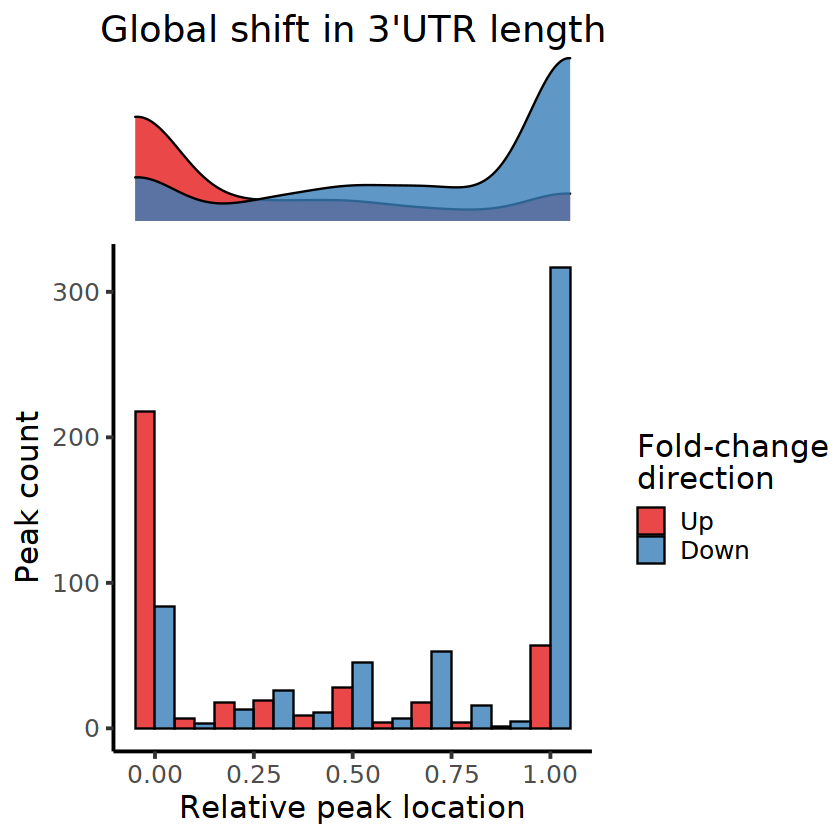

In [26]:
OPC_10vs4_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so_ct, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = '10', 
                                      population.2 =  '4')
OPC_10vs4_utrshift
PlotUTRLengthShift(OPC_10vs4_utrshift)

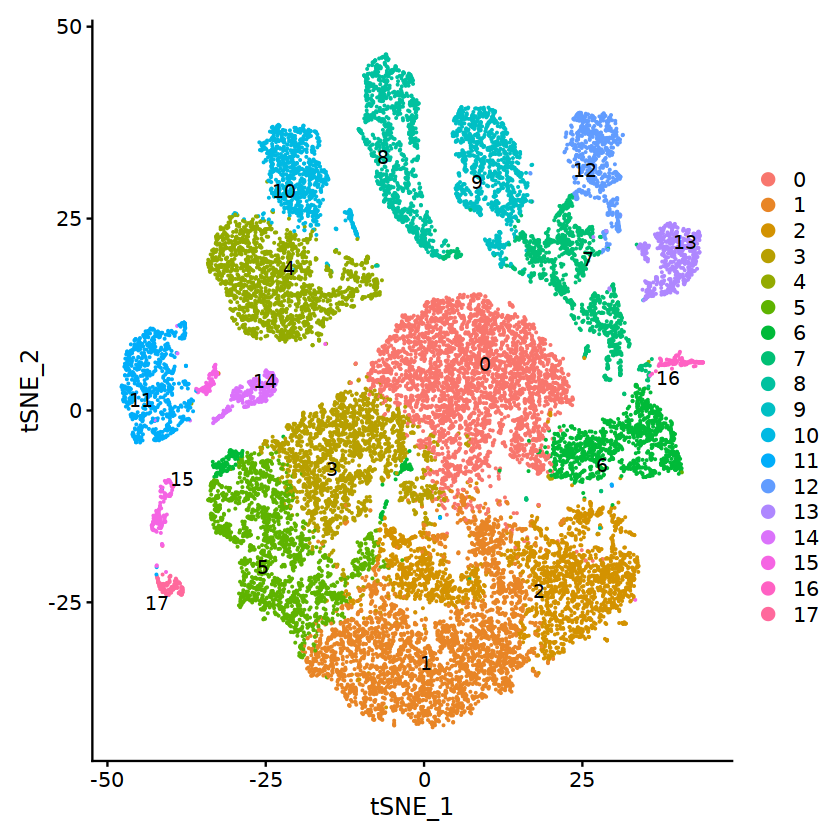

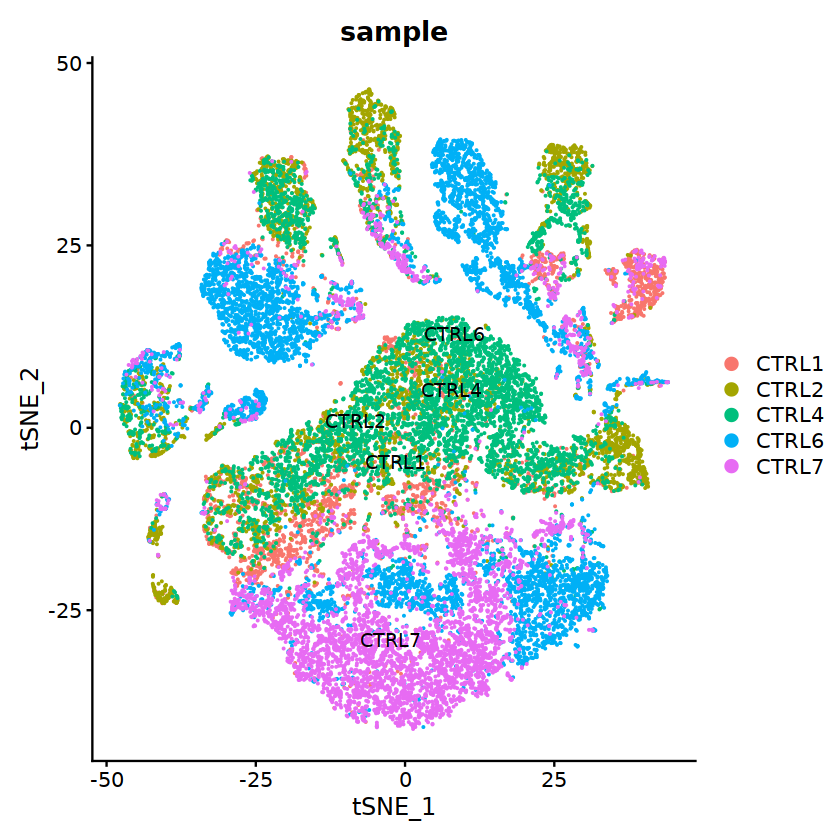

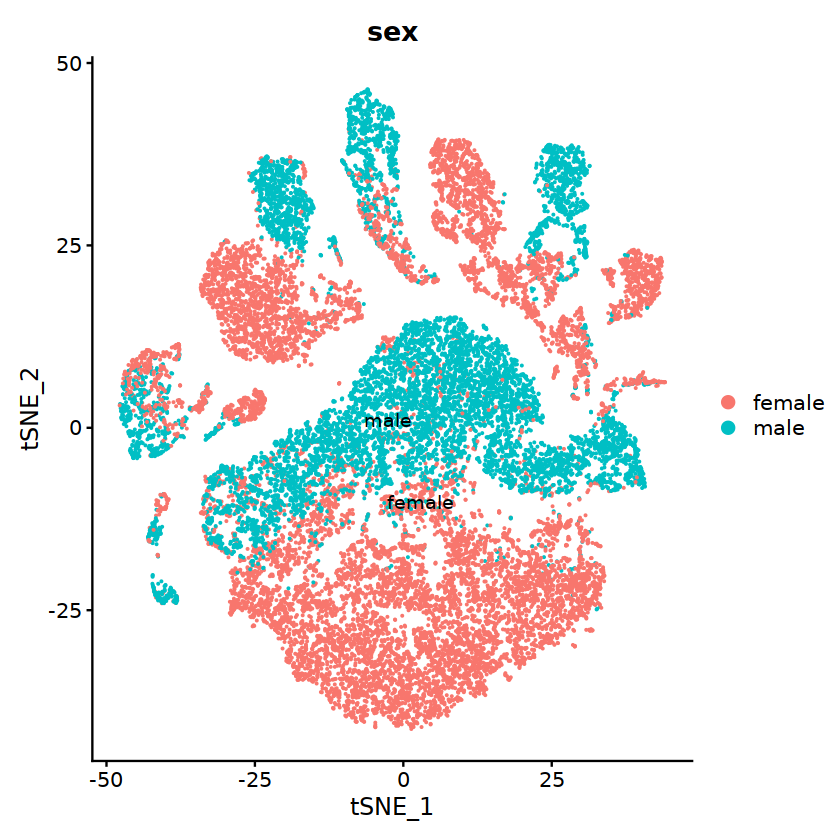

In [31]:
DimPlot(peaks_so_ct, label=T, repel=T)
DimPlot(peaks_so_ct, group.by = 'sample', label=T, repel=T)
DimPlot(peaks_so_ct, group.by = 'sex', label=T, repel=T)

# Ok it was a false hope!  its a batcheffect
## let's remove the batch effect using the samples and then try the clustering again"\

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 252095 by 2687

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 2687 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 78 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 252095 genes



  |======================================================================| 100%


Computing corrected count matrix for 252095 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 7.716894 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 270723 by 4130

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 4130 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"


  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 41 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 270723 genes



  |======================================================================| 100%


Computing corrected count matrix for 270723 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 9.877229 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 268053 by 5225

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 64 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 268053 genes



  |======================================================================| 100%


Computing corrected count matrix for 268053 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 13.91453 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 272660 by 6244

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 48 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 272660 genes



  |======================================================================| 100%


Computing corrected count matrix for 272660 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 16.57585 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 253231 by 4861

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 4861 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 66 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 253231 genes



  |======================================================================| 100%


Computing corrected count matrix for 253231 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 12.18376 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 7057 anchors

Filtering anchors

	Retained 6027 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8787 anchors

Filtering anchors

	Retained 7077 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9801 anchors

Filtering anchors

	Retained 7584 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 8661 anchors

Filtering anchors

	Retained 6725 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9734 anchors

Filtering anchors

	Retained 7740 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 11515 anchors

Fil

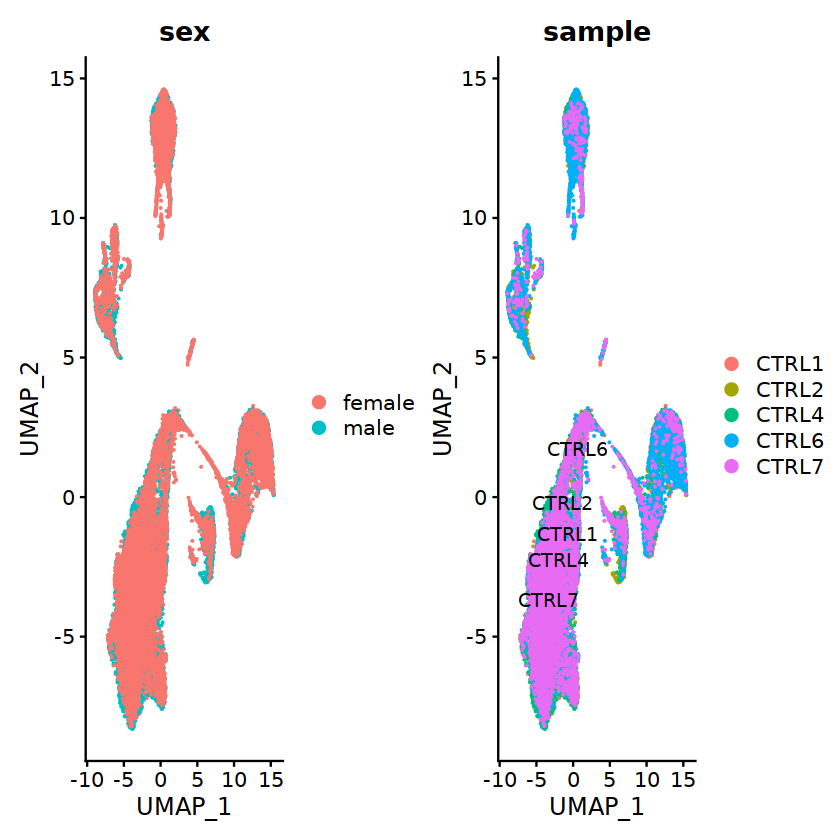

In [33]:
## didn't changed the name of variables
ifnb.list <- SplitObject(peaks_so_ct, split.by = "sample")
ifnb.list <- lapply(X = ifnb.list, FUN = SCTransform)
features <- SelectIntegrationFeatures(object.list = ifnb.list, nfeatures = 3000)
ifnb.list <- PrepSCTIntegration(object.list = ifnb.list, anchor.features = features)


immune.anchors <- FindIntegrationAnchors(object.list = ifnb.list, normalization.method = "SCT",
    anchor.features = features)
peaks_so_ct <- IntegrateData(anchorset = immune.anchors, normalization.method = "SCT")


peaks_so_ct <- RunPCA(peaks_so_ct, verbose = FALSE)
peaks_so_ct <- RunUMAP(peaks_so_ct, reduction = "pca", dims = 1:30)

p1 <- DimPlot(peaks_so_ct, reduction = "umap", group.by = "sex")
p2 <- DimPlot(peaks_so_ct, reduction = "umap", group.by = "sample", label = TRUE,
    repel = TRUE)
p1 + p2

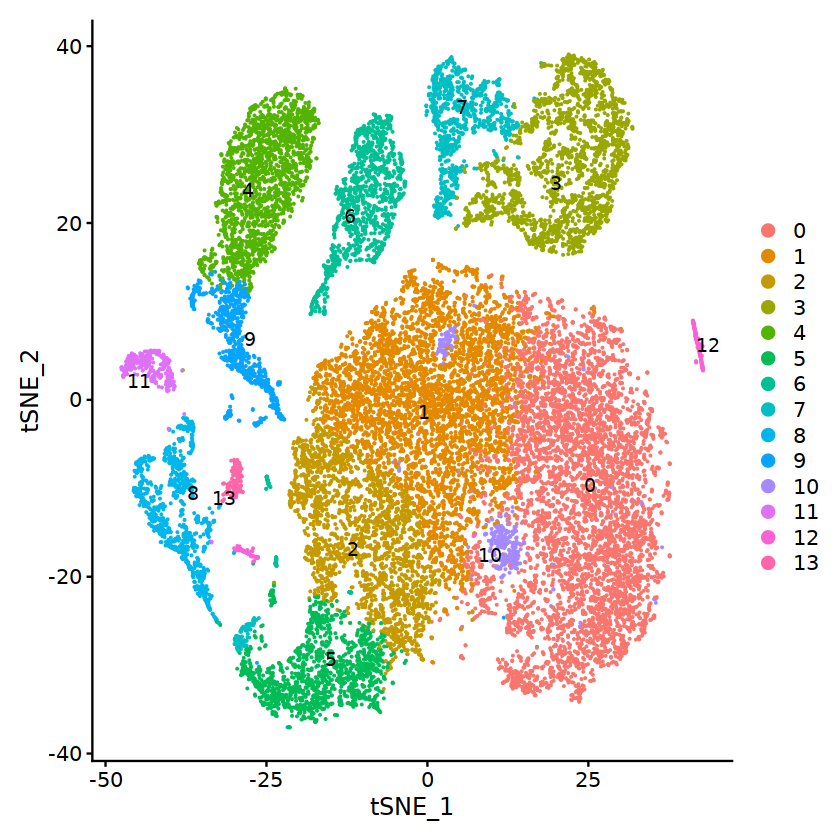

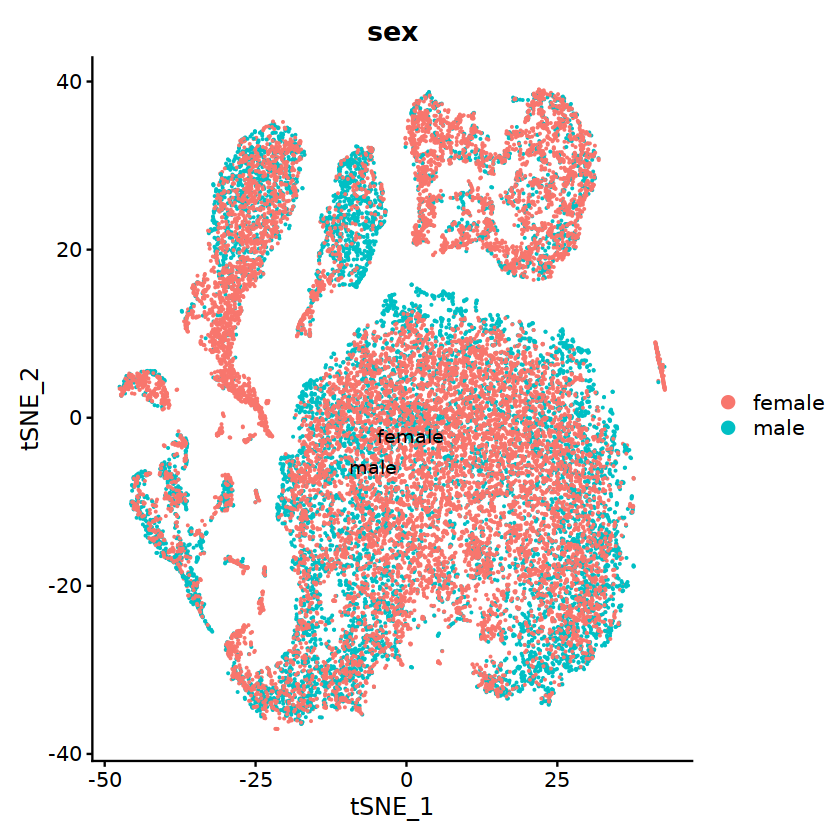

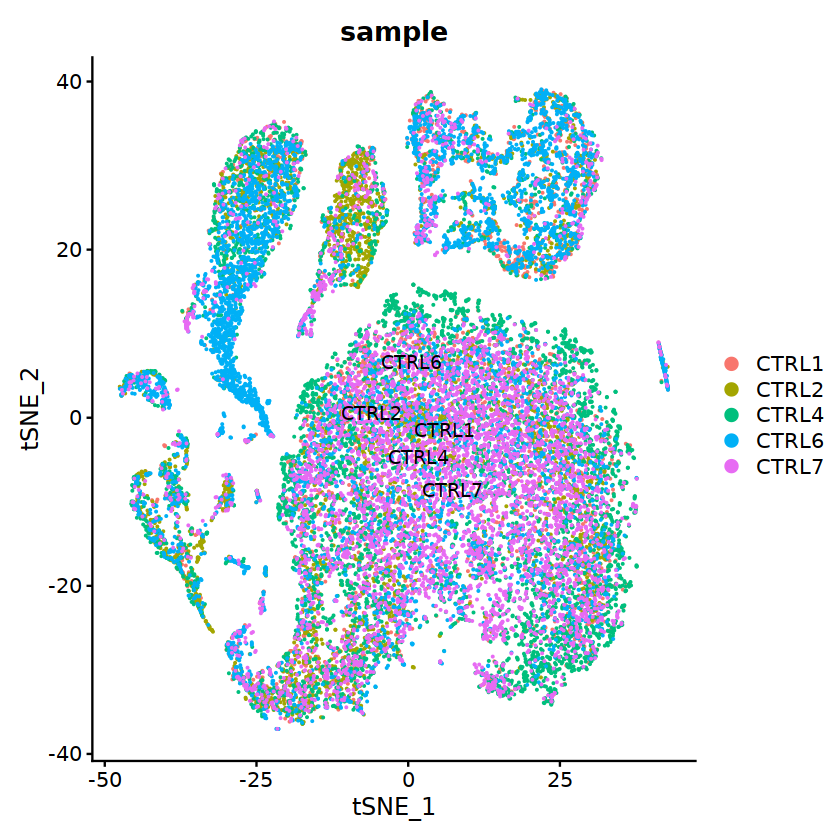

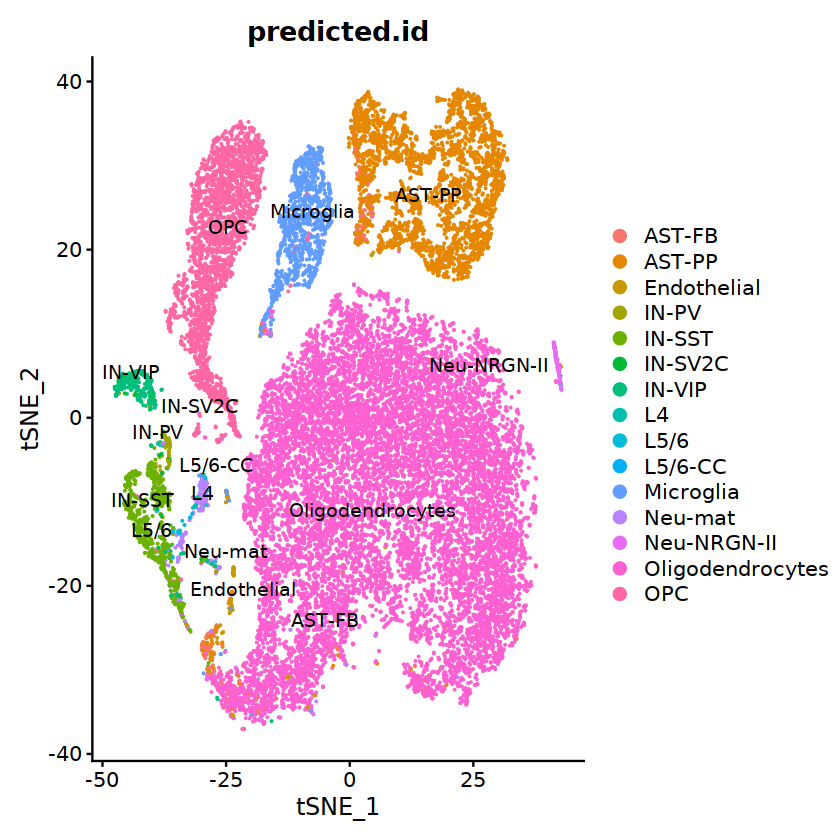

In [35]:
# peaks_so_ct <- FindNeighbors(peaks_so_ct, dims = 1:15)
# peaks_so_ct <- FindClusters(peaks_so_ct, resolution = 0.5)
# peaks_so_ct <- RunTSNE(peaks_so_ct, reduction = "pca", dims = 1:15)
DimPlot(peaks_so_ct, reduction = 'tsne', label=T, repel=T)
DimPlot(peaks_so_ct, reduction = 'tsne', group.by = 'sex', label=T, repel=T)
DimPlot(peaks_so_ct, reduction = 'tsne', group.by = 'sample', label=T, repel=T)
DimPlot(peaks_so_ct, reduction = 'tsne', group.by = 'predicted.id', label=T, repel=T)

In [43]:
DefaultAssay(peaks_so_ct) <- 'SCT'
peaks_so_ct <- SetIdent(peaks_so_ct, value = peaks_so_ct$seurat_clusters)

In [45]:
peaks_so_ct$peaks_clusters <- peaks_so_ct$seurat_clusters

In [46]:
peaks_so <- readRDS('rdata/ALS_CT_v3_final_MD.rds')
peaks_so <- subset(peaks_so, subset= group == 'control')
peaks_so

An object of class Seurat 
279088 features across 23147 samples within 1 assay 
Active assay: RNA (279088 features, 0 variable features)

In [47]:
peaks_so <- AddMetaData(peaks_so, metadata = peaks_so_ct@meta.data)

In [48]:
peaks_so@reductions <- peaks_so_ct@reductions

In [104]:
DimPlot(peaks_so, reduction = 'tsne', group.by = 'predicted.id', label=T, repel=T)
DimPlot(peaks_so, reduction = 'tsne', group.by = 'peaks_clusters', label=T, repel=T)

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

In [51]:
peaks_so <- SetIdent(peaks_so, value = peaks_so$peaks_clusters)

[1] "9425 expressed peaks in feature types UTR3"
[1] "8935 peaks after filtering out A-rich annotations"
[1] "1917 genes detected with multiple peak sites expressed"
[1] "6902 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
MACF1:chr1:39322490-39324813:1       UTR3               0.46438746     
MACF1:chr1:39318480-39324855:1       UTR3               0.56980057     
MACF1:chr1:39319646-39327326:1       UTR3               0.58214625     
LUC7L3:chr17:50745775-50746735:1     UTR3               0.26400760     
LUC7L3:chr17:50743694-50745869:1     UTR3               0.66096866     
LUC7L3:chr17:50745902-50746040:1     UTR3               0.13770180     
LUC7L3:chr17:50745851-50750561:1     UTR3               0.23646724     
SOX9:chr17:72123976-72124630:1       UTR3               0.17378917     
SRSF11:chr1:70235526-70244872:1      UTR3               0.29154796     
SRSF11:chr1:70230882-70244766:1      UTR3               0.33998101     
STXBP5L:chr3:121045502-121206093:1   UTR3               0.25261159     
STXBP5L:chr3:121121526-121157657:1   UTR3               0.14150047     
NCAN:chr19:19248611-19249969:1       UTR3               0.23836657     
HSPB1:chr7:76302939-76303423:1       UTR3               0.20512821     
RBM25:chr14:73103442-73112182:1      UTR3               0.33333333     
RBM25:chr14:73103062-73106284:1      UTR3               0.34377968     
RBM25:chr14:73102971-73107882:1      UTR3               0.38746439     
NKTR:chr3:42635167-42635437:1        UTR3               0.18328585     
NKTR:chr3:42635333-42637975:1        UTR3               0.39696106     
NKTR:chr3:42633635-42637045:1        UTR3               0.31813865     
NKTR:chr3:42634570-42637045:1        UTR3               0.30294397     
LRP10:chr14:22879750-22880708:1      UTR3               0.08831909     
PTPRZ1:chr7:122010236-122010569:1    UTR3               0.11870845     
ID4:chr6:19837824-19839401:1         UTR3               0.32668566     
PPFIA1:chr11:70330140-70332178:1     UTR3               0.18518519     
ATP2A2:chr12:110292083-110327737:1   UTR3               0.23076923     
PDIA3:chr15:43756561-43765651:1      UTR3               0.09211776     
PDIA3:chr15:43756570-43763362:1      UTR3               0.08641975     
SLC1A3:chr5:36680218-36686526:1      UTR3               0.44729345     
MYO6:chr6:75885967-75890302:1        UTR3               0.32668566     
⋮                                    ⋮                  ⋮              
TMED5:chr1:93151790-93152364:-1      UTR3               0.07882241     
SPPL2A:chr15:50702266-50702655:-1    UTR3               0.04843305     
ITPR2:chr12:26336448-26336892:-1     UTR3               0.05698006     
IGSF11:chr3:118900557-118901214:-1   UTR3               0.05318139     
AATK:chr17:81117252-81117794:-1      UTR3               0.07597341     
GABRA2:chr4:46248427-46249060:-1     UTR3               0.13010446     
MTUS1:chr8:17684230-17697749:-1      UTR3               0.08926876     
PSD3:chr8:18530629-18531205:-1       UTR3               0.06742640     
CSGALNACT1:chr8:19404161-19404464:-1 UTR3               0.14150047     
ANKRD36C:chr2:95962484-95987039:-1   UTR3               0.24501425     
SNX14:chr6:85505718-85508227:-1      UTR3               0.07122507     
PLD5:chr1:242124525-242265473:-1     UTR3               0.12345679     
RORA:chr15:60488284-60488606:-1      UTR3               0.03798670     
NFIB:chr9:14081843-14082179:-1       UTR3               0.05508072     
GLUD1:chr10:87050434-87050974:-1     UTR3               0.14624881     
ARHGAP21:chr10:24583609-24583977:-1  UTR3               0.15194682     
TRIM9:chr14:50975262-50975604:-1     UTR3               0.13010446     
CBX5:chr12:54230942-54231320:-1      UTR3               0.07122507     
C6orf62:chr6:24704861-24705439:-1    UTR3               0.20607787     
RTN4:chr2:54972753-54974710:-1       UTR3               0.16144349     
RTN4:chr2:54972730-54973865:-1       UTR3               0.15669516     
RSRC2:chr12:122504673-122505172:-1   UTR3               0.05033238     
SMG1:chr16:18804853-18805259:-1      UTR3               0.08736942     
UBE2G2:chr21:44776764-44777410:-1    UTR3               0.09021842     
NADK2

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 3.02609769802306e-14"


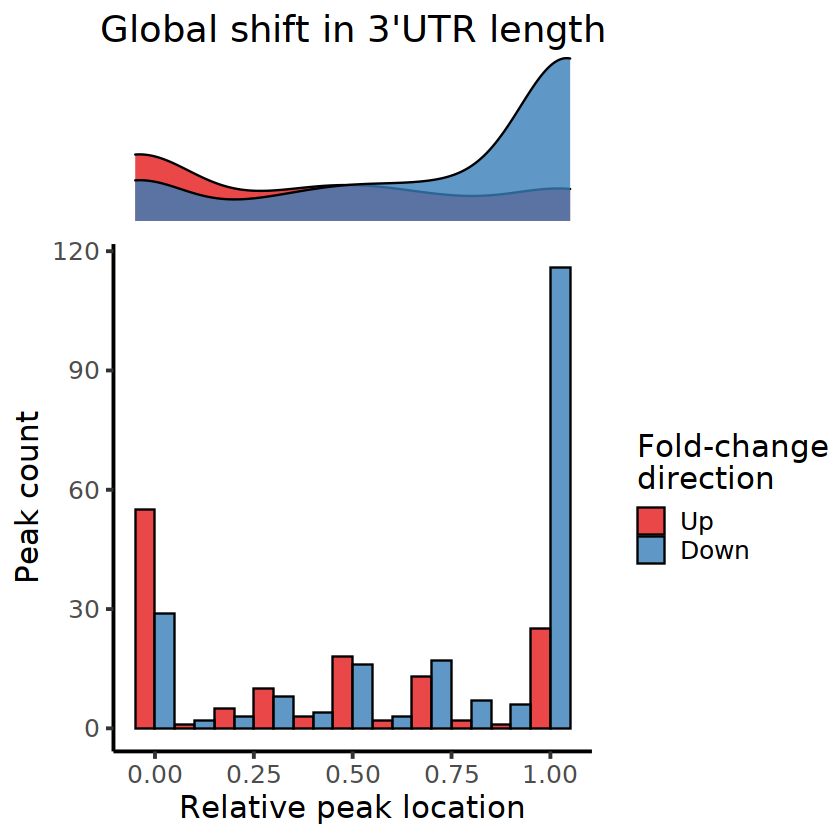

In [52]:
Ast_7vs3_utrshift <- DetectUTRLengthShift(peaks.object = peaks_so, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = '7', 
                                      population.2 =  '3')
Ast_7vs3_utrshift
PlotUTRLengthShift(Ast_7vs3_utrshift)

In [53]:
## ok AST 7 vs 3 are different subclusters of AST lets do GSEA on them and see the results
ge_so_als_P <- readRDS('rdata/ALS_CT_ge_so_labeled.rds')
ge_so_als_P

An object of class Seurat 
68360 features across 106266 samples within 3 assays 
Active assay: SCT (30118 features, 0 variable features)
 2 other assays present: RNA, integrated
 3 dimensional reductions calculated: pca, tsne, umap

In [55]:
ge_so_als_P_ct <- subset(ge_so_als_P, subset=group=='control')
ge_so_als_P_ct

An object of class Seurat 
68360 features across 29708 samples within 3 assays 
Active assay: SCT (30118 features, 0 variable features)
 2 other assays present: RNA, integrated
 3 dimensional reductions calculated: pca, tsne, umap

In [56]:
ge_so_als_P_ct <- AddMetaData(ge_so_als_P_ct, metadata = peaks_so@meta.data)

In [57]:
library(presto)
library(ggplot2)
library(msigdbr)
library(fgsea)
library(Seurat)
library(tidyverse)

In [58]:
m_df<- msigdbr(species = "Homo sapiens", category = "C5", subcategory='BP')
fgsea_sets<- m_df %>% split(x = .$gene_symbol, f = .$gs_name)

In [59]:
ct_clusters_wilcox <- wilcoxauc(ge_so_als_P_ct, 'peaks_clusters')
ct_clusters_wilcox

Removing NA values from labels



feature      group avgExpr      logFC         statistic auc      
1      MIR1302-2HG  0     0.000000e+00 -3.381289e-05 49503114  0.4999714
2      AL627309.1   0     6.643369e-03 -3.657941e-03 49248877  0.4974037
3      AL627309.3   0     8.711398e-05 -5.068969e-04 49460888  0.4995449
4      AL627309.5   0     1.021181e-02 -9.263230e-03 48864346  0.4935200
5      AP006222.2   0     0.000000e+00 -7.700784e-05 49497452  0.4999142
6      AL669831.2   0     4.874405e-04 -2.038054e-04 49478643  0.4997242
7      LINC01409    0     9.412445e-02 -2.393556e-02 47830824  0.4830816
8      FAM87B       0     4.532873e-04 -9.546624e-04 49430258  0.4992356
9      LINC01128    0     6.605166e-02 -1.340674e-02 48508674  0.4899278
10     LINC00115    0     1.204797e-02 -1.425818e-03 49393125  0.4988605
11     FAM41C       0     7.512409e-03  2.716937e-03 49654712  0.5015025
12     AL645608.6   0     0.000000e+00 -2.781190e-03 49319067  0.4981126
13     AL645608.2   0     9.798317e-05 -1.007391e-03 49426913  0.4992018
14     AL645608.4   0     0.000000e+00 -5.585555e-05 49503114  0.4999714
15     LINC02593    0     1.195139e-04 -1.954961e-03 49398590  0.4989157
16     SAMD11       0     1.254851e-03 -8.795948e-03 48990075  0.4947898
17     NOC2L        0     8.646210e-02  2.176008e-02 50688498  0.5119435
18     KLHL17       0     6.267565e-03 -2.036363e-03 49255636  0.4974719
19     PLEKHN1      0     0.000000e+00 -5.276864e-04 49469136  0.4996282
20     PERM1        0     0.000000e+00 -4.000936e-04 49474800  0.4996854
21     AL645608.7   0     7.367090e-04 -5.727185e-03 49079616  0.4956942
22     HES4         0     1.950997e-02 -5.159515e-02 46475317  0.4693913
23     ISG15        0     9.484361e-03 -4.913401e-02 46681546  0.4714741
24     AL645608.1   0     6.305443e-04  2.302685e-04 49498208  0.4999218
25     AGRN         0     1.001090e-01  4.319146e-03 49514758  0.5000890
26     RNF223       0     1.100350e-04 -3.095356e-05 49500532  0.4999453
27     C1orf159     0     1.936235e-01  8.630591e-03 49780359  0.5027715
28     AL390719.3   0     3.238094e-02  1.532377e-02 50487786  0.5099164
29     LINC01342    0     0.000000e+00 -2.377560e-04 49483294  0.4997712
30     TTLL10       0     6.862634e-04 -1.981785e-04 49478645  0.4997243
⋮      ⋮            ⋮     ⋮            ⋮             ⋮         ⋮        
493359 AC100826.1   9     0            0             9207825   0.5      
493360 AC142086.1   9     0            0             9207825   0.5      
493361 hsa-mir-1253 9     0            0             9207825   0.5      
493362 LINC02075    9     0            0             9207825   0.5      
493363 AP001120.1   9     0            0             9207825   0.5      
493364 AC005379.1   9     0            0             9207825   0.5      
493365 AC018761.3   9     0            0             9207825   0.5      
493366 AL023913.1   9     0            0             9207825   0.5      
493367 DSCR4        9     0            0             9207825   0.5      
493368 LINC02557    9     0            0             9207825   0.5      
493369 AL022314.1   9     0            0             9207825   0.5      
493370 BX284656.2   9     0            0             9207825   0.5      
493371 AL772284.2   9     0            0             9207825   0.5      
493372 AL359979.2   9     0            0             9207825   0.5      
493373 OR5AC2       9     0            0             9207825   0.5      
493374 AC010255.2   9     0            0             9207825   0.5      
493375 AC091979.2   9     0            0             9207825   0.5      
493376 AC113423.1   9     0            0             9207825   0.5      
493377 OR2Y1        9     0            0             9207825   0.5      
493378 PGK2         9     0            0             9207825   0.5      
493379 AL138733.2   9     0            0             9207825   0.5      
493380 AC004080.1   9     0            0             9207825   0.5      
493381 TAS2R16      9     0            0             9207825   0.

In [ ]:
## function for gsea plotting
gsea_it <- function(sc, outname, ge_de_wilcox){
    results_root <- '/data1/APA/Paul_ALS_Data/results/'
    cluster0.genes <- ge_de_wilcox %>%
      dplyr::filter(group == sc) %>%
      arrange(desc(auc)) %>% 
      dplyr::select(feature, auc)

    ranks <- deframe(cluster0.genes)
    fgseaRes <- fgsea(fgsea_sets, stats = ranks)
    fgseaResTidy <- fgseaRes %>%
      as_tibble() %>%
      arrange(desc(NES))
    plot_name <- paste0(results_root, 'gsea_res/',outname,'.pdf')
    pdf(file=plot_name, onefile = T, width = 30, height = 12, paper='A4r')
    p <- ggplot(fgseaResTidy %>% filter(padj < 0.05) %>% head(n= 40), aes(reorder(pathway, NES), NES)) +
         geom_col(aes(fill= NES)) +
         coord_flip() +
         labs(x="Pathway", y="Normalized Enrichment Score",
              title="Hallmark pathways NES from GSEA") + 
         theme_minimal() + ggtitle(paste0('GSEA pathway analysis for subcluster_',sc))
        print(p)
        dev.off()
}

In [86]:
gsea_it('3', 'astrocyte_subcluster_3', ct_clusters_wilcox)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (22.68% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos"."
Warning message in fgseaMultilevel(...):
"There were 1 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)"


ERROR: Error in mcfork(detached): unable to fork, possible reason: Cannot allocate memory


In [ ]:
gsea_it('7', 'astrocyte_subcluster_7', ct_clusters_wilcox)

In [ ]:
gsea_it('4', 'OPC_subcluster_4', ct_clusters_wilcox)

In [ ]:
gsea_it('9', 'OPC_subcluster_9', ct_clusters_wilcox)

In [80]:
library(ReactomeGSA)
ge_so_als_P_ct <- SetIdent(ge_so_als_P_ct, value = ge_so_als_P_ct$peaks_clusters )
gsva_result <- analyse_sc_clusters(ge_so_als_P_ct, verbose = TRUE)
plot_gsva_heatmap(gsva_result, max_pathways = 15, margins = c(6,20),truncate_name=F)

Calculating average cluster expression...

Converting expression data to string... (This may take a moment)

Conversion complete

Submitting request to Reactome API...

Compressing request data...

Reactome Analysis submitted succesfully

Converting dataset Seurat...

Mapping identifiers...

Performing gene set analysis using ssGSEA

Analysing dataset 'Seurat' using ssGSEA

Retrieving result...



ERROR: Error in file(con, "rb"): cannot open the connection


Plot with title "Color Key"

In [87]:
ge_so_als_P_ct

An object of class Seurat 
68360 features across 29708 samples within 3 assays 
Active assay: SCT (30118 features, 0 variable features)
 2 other assays present: RNA, integrated
 3 dimensional reductions calculated: pca, tsne, umap

In [95]:
DefaultAssay(ge_so_als_P_ct) <- 'RNA'
## normalization
ge_so_als_P_ct_2 <- NormalizeData(ge_so_als_P_ct, normalization.method = "LogNormalize", scale.factor = 10000)
ge_so_als_P_ct_2 <- ScaleData(ge_so_als_P_ct_2)
ge_so_als_P_ct_2 <- FindVariableFeatures(ge_so_als_P_ct_2, selection.method = "vst", nfeatures = 2000)
ge_so_als_P_ct_2 <- RunPCA(ge_so_als_P_ct_2)

Centering and scaling data matrix

PC_ 1 
Positive:  FAM155A, NRXN1, NRG3, NRCAM, PLCB1, KCNMA1, PTPRG, NTRK3, CNTN1, DLGAP1 
	   GPM6A, NEBL, THRB, FGF14, MAP2, SLC35F1, TMEM132B, CDH10, RORA, NOL4 
	   AGBL4, PCDH7, CTNNA2, SOX5, CHL1, AC092691.1, RGS7, STXBP5L, DGKG, GABRB1 
Negative:  AC008571.2, AC012494.1, SPP1, AC090015.1, AL033523.1, LINC00609, LINC01170, LAMA2, SLC5A11, LURAP1L-AS1 
	   SVEP1, AL354809.1, PDE1A, ADAMTS18, AC061708.1, ELOVL7, LINC02073, PACRG-AS3, LINC01470, AL034405.1 
	   AL158077.2, ROR1, AOAH, LINC01949, MAGEC3, TAFA4, AC103770.1, AC109927.1, LINC01445, AP000477.3 
PC_ 2 
Positive:  OBI1-AS1, BMPR1B, ADGRV1, AL137139.2, STON2, RANBP3L, RYR3, MRVI1, GLI3, LINC00299 
	   PRDM16, SLCO1C1, RFX4, LINC00499, AQP4, FAM189A2, GPC5, GLIS3, SLC4A4, SLC7A11 
	   YAP1, SLC1A3, ATP1A2, FGFR3, ACSS3, RGS20, ARHGEF26, GJA1, ETNPPL, SHROOM3 
Negative:  RIMS2, CNTNAP2, MYT1L, RBFOX1, GRIN2B, FGF12, MEG3, CSMD1, SLC4A10, GRM5 
	   OPCML, ATRNL1, CCSER1, XKR4, SCN2A, KAZN, CN

ERROR: Error in file(con, "rb"): cannot open the connection


plot without title

In [96]:
ge_so_als_P_ct_2 <- FindNeighbors(ge_so_als_P_ct_2, dims = 1:15)
ge_so_als_P_ct_2 <- FindClusters(ge_so_als_P_ct_2, resolution = 0.5)
ge_so_als_P_ct_2 <- RunTSNE(ge_so_als_P_ct_2, reduction = "pca", dims = 1:15)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 29708
Number of edges: 968948

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9227
Number of communities: 18
Elapsed time: 5 seconds


In [3]:
ge_so_als_P_ct_2 <- readRDS('rdata/ge_so_als_ct.rds')

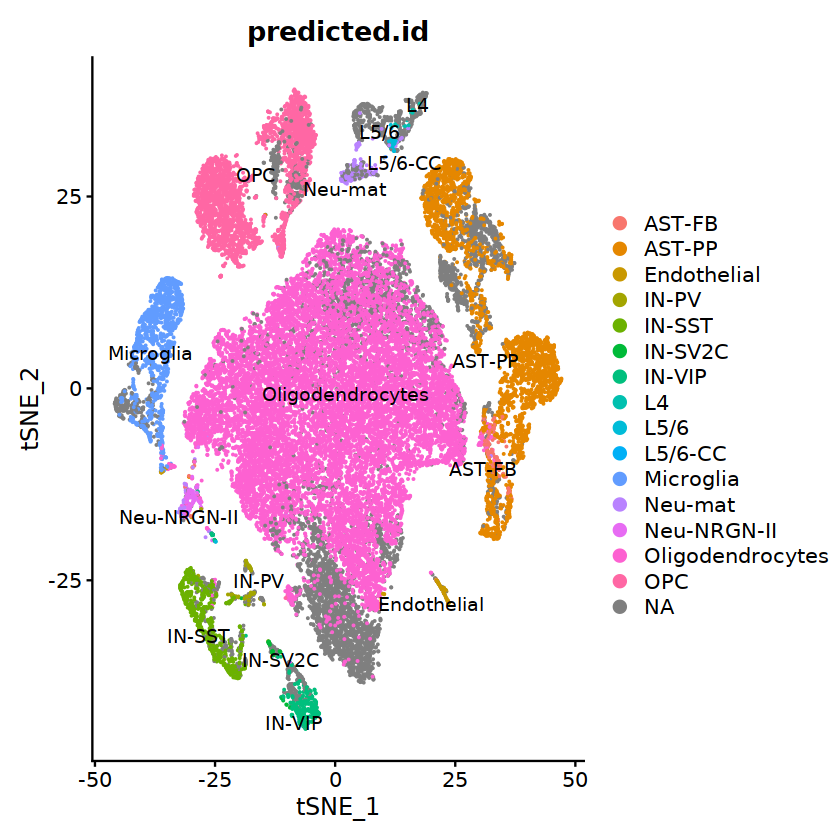

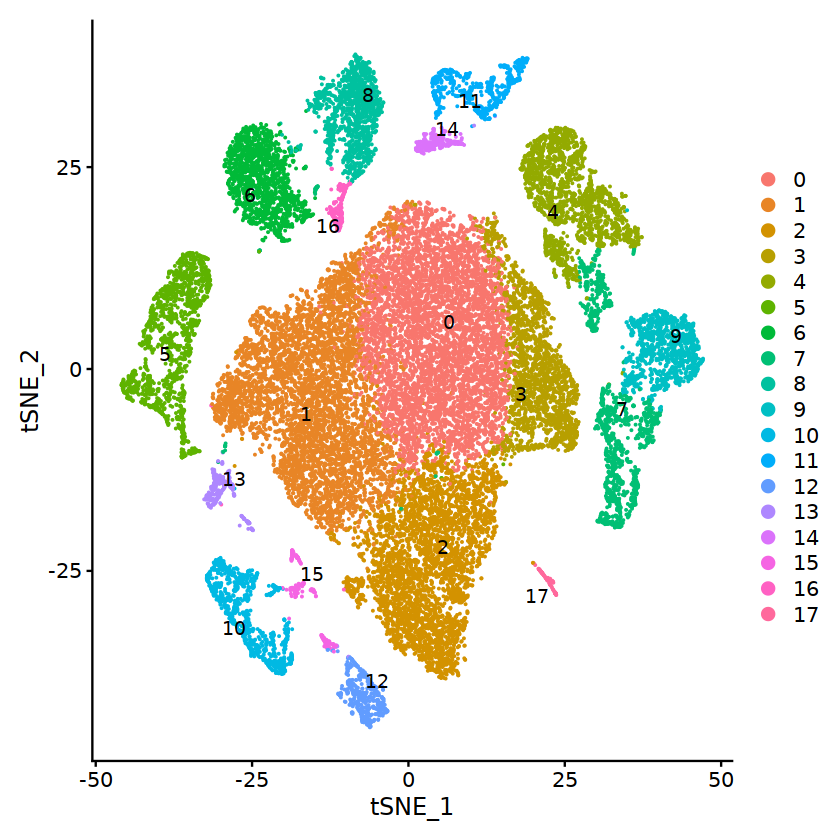

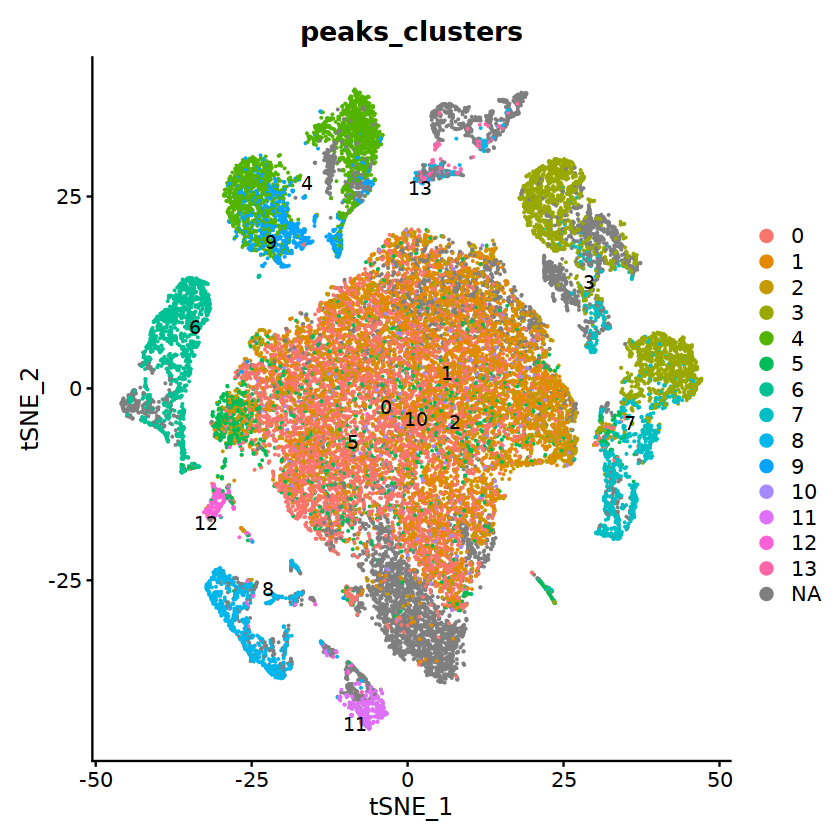

In [6]:
DimPlot(ge_so_als_P_ct_2, reduction = 'tsne', group.by = 'predicted.id', label=T, repel=T)
DimPlot(ge_so_als_P_ct_2, reduction = 'tsne', label=T, repel=T)
DimPlot(ge_so_als_P_ct_2, reduction = 'tsne', group.by = 'peaks_clusters', label=T, repel=T)